In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import imdb
import matplotlib.pyplot as plt

from tensorflow.keras.layers import GRU, Embedding
from tensorflow.keras.preprocessing import sequence

In [2]:
def GRU_imdb(X_train, Y_train, num_words):
    model = Sequential()
    model.add(Embedding(num_words, 128))
    model.add(GRU(128, dropout=0.2, recurrent_dropout=0.2))
    model.add(Dense(1, activation="sigmoid"))
    
    model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
    return model

def preprocess_imdb_data(X_train, X_test, maxlen):
    X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
    X_test = sequence.pad_sequences(X_test, maxlen=maxlen)
    return X_train, X_test

def train_model(model, epochs, batch_size):
    history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=2)
    return history

def visual_train_status(history):
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    acc = history.history["accuracy"]
    val_acc = history.history["val_accuracy"]
    epochs = range(1, len(loss)+1)
    
    plt.figure(figsize=(12,3))
    plt.subplot(121)
    plt.plot(epochs, loss, "bo-", label="Training Loss")
    plt.plot(epochs, val_loss, "ro--", label="Validation Loss")
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epochs')
    plt.legend()    
    plt.subplot(122)
    plt.plot(epochs, acc, "bo-", label="Training Acc")
    plt.plot(epochs, val_acc, "ro--", label="Validation Acc")
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epochs')
    plt.legend()
    plt.show()

In [3]:
num_words = 2000 # 20000
maxlen = 100
(X_train, Y_train), (X_test, Y_test) = imdb.load_data(num_words=num_words)
X_train, X_test = preprocess_imdb_data(X_train, X_test, maxlen=maxlen)

model = GRU_imdb(X_train, Y_train, num_words=num_words)
model.summary()

history = train_model(model, epochs=3, batch_size=128)

loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print("測試資料集的準確度 = {:.2f}".format(accuracy))

C:\Users\lucif\.conda\envs\tf20\lib\site-packages\tensorflow_core\python\keras\datasets\imdb.py:129: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\lucif\.conda\envs\tf20\lib\site-packages\tensorflow_core\python\keras\datasets\imdb.py:130: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 128)         256000    
_________________________________________________________________
gru (GRU)                    (None, 128)               99072     
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 355,201
Trainable params: 355,201
Non-trainable params: 0
_________________________________________________________________
Train on 20000 samples, validate on 5000 samples
Epoch 1/3
20000/20000 - 144s - loss: 0.5418 - accuracy: 0.7167 - val_loss: 0.5513 - val_accuracy: 0.7180
Epoch 2/3
20000/20000 - 132s - loss: 0.5487 - accuracy: 0.7318 - val_loss: 0.5989 - val_accuracy: 0.6746
Epoch 3/3
20000/20000 - 124s - loss: 0.5457 - accuracy: 0.7203 - val_loss: 0.5948 - val_accuracy: 0.6652
測試資料集的準確度 = 0.67

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


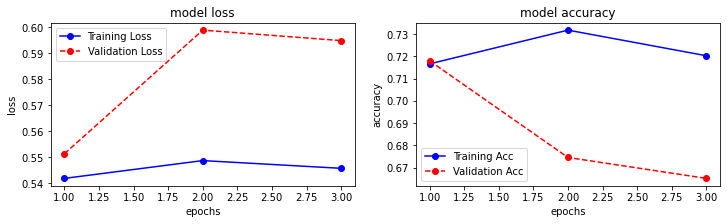

In [4]:
print(history.history.keys())
visual_train_status(history)